In [2]:
#pip install datasets 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

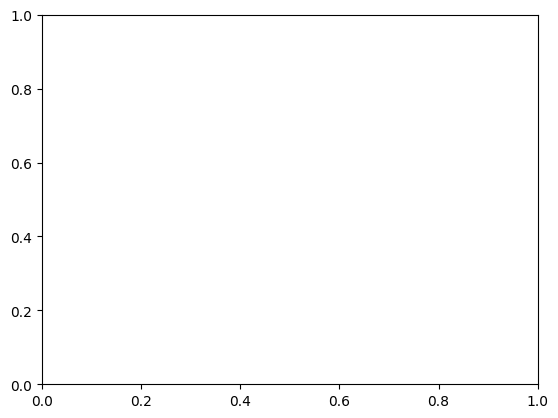

In [ ]:
fig,ax = plt.subplots() #bir eksen (grafiğin çizileceği alan) oluşturur.

<Axes: xlabel='job_title_short'>

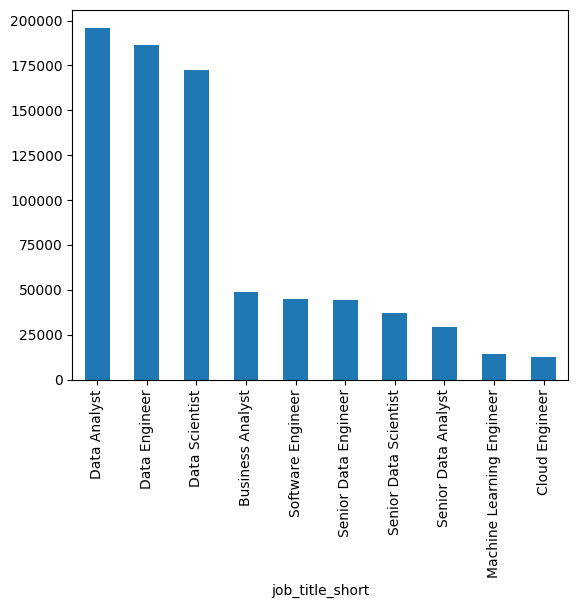

In [6]:
fig,ax = plt.subplots()
df["job_title_short"].value_counts().head(10).plot(kind='bar', ax=ax)

In [7]:
df["job_title_short"].value_counts()


job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [8]:
df["job_schedule_type"].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

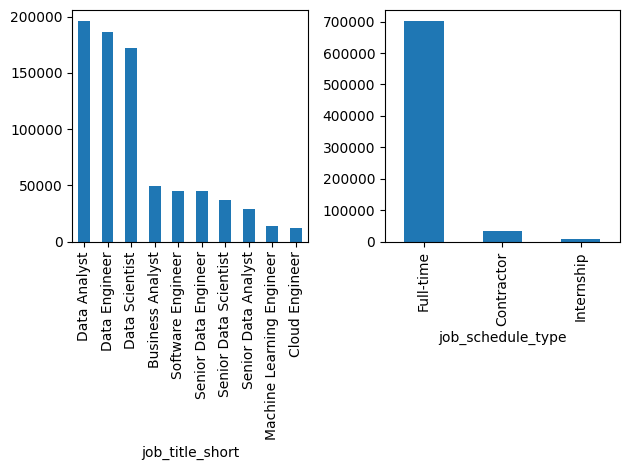

In [11]:
fig,ax =plt.subplots(1,2)#1, 2 parametresi: 1 satır, 2 sütun şeklinde yerleşim demektir.

df["job_title_short"].value_counts().plot(kind='bar', ax=ax[0])
df["job_schedule_type"].value_counts().head(3).plot(kind='bar', ax=ax[1])
fig.tight_layout() #grafiklerin düzenli görünmesi için kullanılır.

In [23]:
df_skills=df.copy()
df_skills= df_skills.explode("job_skills") #her bir iş için becerileri ayrı satırlara ayırır.
skills_count=df_skills.groupby(["job_skills","job_title_short"]).size()
df_skills_count=skills_count.reset_index(name="skill_count") #indexi resetler ve sayıları "count" sütununa atar.
df_skills_count.sort_values(by= "skill_count", ascending=False,inplace=True) #en çok kullanılan 10 beceriyi alır.

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [37]:
job_titles = ["Data Scientist", "Data Engineer", "Data Analyst"]

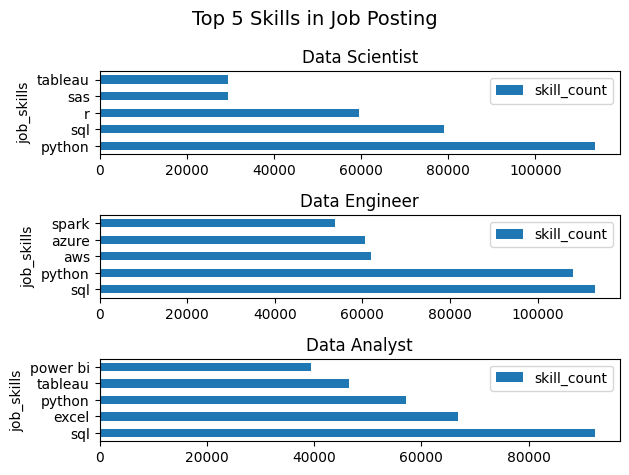

In [44]:
fig,ax= plt.subplots(3,1) #figür boyutunu ayarlar.
for i , job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count["job_title_short"]==job_title].head(5)
    df_plot.plot(kind="barh", x="job_skills" , y="skill_count" ,  ax=ax[i],title=job_title)
    fig.suptitle("Top 5 Skills in Job Posting" , fontsize=14) #alt başlık ekler.
    fig.tight_layout()